# Exploration of `ExPeCoN`

Running analyses for `ExPeCoN`

results are published in Forster et al., 2024 (hopefully)
___

    Author:  Carina Forster et al.
    Contact: forster@cbs.mpg.de
    Years:   2023

___

## Setup 

In [1]:
# Import my expecon_ms package and other modules
from pathlib import Path

from expecon_ms.configs import config, params, path_to


***********************************************************************************************
***********************************************************************************************

										expecon_ms

***********************************************************************************************
***********************************************************************************************

Current working dir:	/data/pt_02773/expecon_ms/code/notebooks
New working dir: '/data/pt_02773/expecon_ms'



In [2]:
# Set global vars & paths

# this doesn't work for some reason
# the variables set here are not recognized in the functions

# raw concatenated eeg data
save_dir_concatenated_raw1 = Path(path_to.data.eeg.RAW_expecon1)
save_dir_concatenated_raw2 = Path(path_to.data.eeg.RAW_expecon2)
save_dir_concatenated_raw1.mkdir(parents=True, exist_ok=True)
save_dir_concatenated_raw2.mkdir(parents=True, exist_ok=True)

# stimulus locked
save_dir_stim_1 = Path(path_to.data.eeg.preprocessed.stimulus_expecon1)
save_dir_stim_2 = Path(path_to.data.eeg.preprocessed.stimulus_expecon2)
save_dir_stim_1.mkdir(parents=True, exist_ok=True)
save_dir_stim_2.mkdir(parents=True, exist_ok=True)

# cue locked
save_dir_cue_1 = Path(path_to.data.eeg.preprocessed.cue_expecon1)
save_dir_cue_2 = Path(path_to.data.eeg.preprocessed.cue_expecon2)
save_dir_cue_1.mkdir(parents=True, exist_ok=True)
save_dir_cue_2.mkdir(parents=True, exist_ok=True)

# directory that contains the cleaned epochs
dir_clean_epochs_expecon1 = Path(path_to.data.eeg.preprocessed.ica.clean_epochs_expecon1)
dir_clean_epochs_expecon2 = Path(path_to.data.eeg.preprocessed.ica.clean_epochs_expecon2)

# EEG cap layout file
filename_montage = Path(path_to.data.templates)
filename_montage.mkdir(parents=True, exist_ok=True)

# raw behavioral data
behav_path = Path(path_to.data.behavior)
behav_path.mkdir(parents=True, exist_ok=True)

# participant IDs
id_list_expecon1 = config.participants.ID_list_expecon1
id_list_expecon2 = config.participants.ID_list_expecon2

# pilot data counter (for expecon 1, participant ID starts with ID007)
pilot_counter = config.participants.pilot_counter

# data_cleaning parameters defined in config.toml
rt_max = config.behavioral_cleaning.rt_max
rt_min = config.behavioral_cleaning.rt_min
hitrate_max = config.behavioral_cleaning.hitrate_max
hitrate_min = config.behavioral_cleaning.hitrate_min
farate_max = config.behavioral_cleaning.farate_max
hit_fa_diff = config.behavioral_cleaning.hit_fa_diff

## Analyse 

1. Preprocessing

In [3]:
# Import functions from expecon_package for data analysis
from expecon_ms.eeg.preprocessing import prepro as pp
from expecon_ms.eeg.preprocessing import ica

Last Commit Date for E:\expecon_ms\code\expecon_ms\eeg\preprocessing\prepro.py : Mon Dec 18 12:03:39 2023 +1000
Last Commit Date for E:\expecon_ms\code\expecon_ms\eeg\preprocessing\ica.py : Tue Dec 19 20:18:03 2023 +1000


In [ ]:
# function expects a raw object with .fif file ending
pp.prepro(study=2, trigger='stimulus', l_freq=1, h_freq=40, tmin=-1,
        tmax=1, resample_rate=250,
        sf=2500, detrend=1, ransac=1, autoreject=0)

# how many channels were interpolated?
pp.n_channels_interpolated(study=2, trigger='stimulus', l_freq=0.1)

# run ica on clean, epoched data
ica.run_ica(study=2, infomax=1, save_psd=1)
# correlate with EOG and ECG and mark bad componets for rejection

ica.label_ica_correlation(study=2)

# usa icalabel to mark components for rejection
#ica.label_iclabel(study=1)

ICA stats

In [6]:
import pandas as pd

# how many components did we reject for study 1 and 2?
#df = pd.read_csv("E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr1\ica_components_stats_icacorr.csv")
df = pd.read_csv("E:\expecon_ms\data\eeg\prepro_ica\clean_epochs_corr2\ica_components_stats_icacorr.csv")

# mean components rejected
print(f' on average {df["0"].mean()} components were rejected')
print(f' the sdt of components rejected is {df["0"].std()}')
print(f' the maximum of components rejected is {df["0"].max()}')
print(f' the minimum of components rejected is {df["0"].min()}')

 on average 3.5384615384615383 components were rejected
 the sdt of components rejected is 1.1663292359534148
 the maximum of components rejected is 6
 the minimum of components rejected is 1


2. Evoked potentials

In [7]:
# import relevant functions from expecon_ms
from expecon_ms.eeg.sensor import evokeds as evo

Last Commit Date for E:\expecon_ms\code\expecon_ms\eeg\sensor\evokeds.py : Tue Dec 19 12:28:29 2023 +1000


In [ ]:
# compare evokeds and plot contrasts
evokeds = evo.create_contrast(study=2, drop_bads=True, laplace=False,
                              subtract_evoked=False, save_data_to_disk=False,
                              save_drop_log=False)

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode

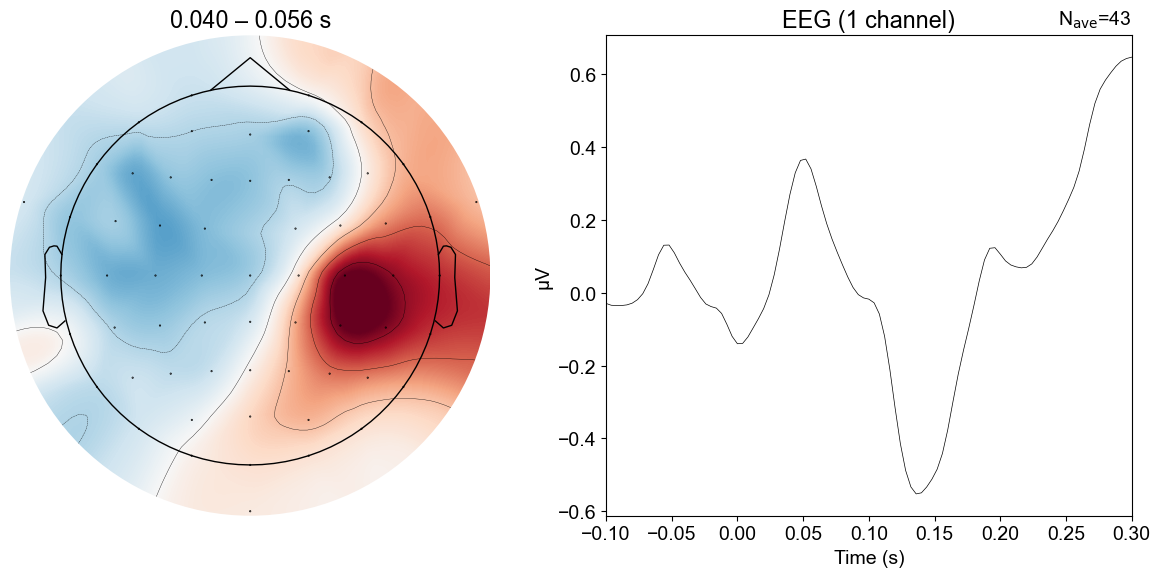

In [4]:
# plot evoked contrast and topography for the contrast
evo.plot_roi(study=2, data=evokeds, tmin=-0.1, tmax=0.3, tmin_base=-0.1, tmax_base=0)

3. Time-frequency analysis

In [11]:
# import relevant functions from expecon_ms
from expecon_ms.eeg.sensor import tfr_contrasts as tfr

Last Commit Date for /data/pt_02773/expecon_ms/code/expecon_ms/eeg/sensor/tfr_contrasts.py : Fri Jan 5 05:05:45 2024 +0100


In [16]:
# compute tfr representations for each condition
tfr.compute_tfr(study=2, cond='prev_resp', tmin=-0.4, tmax=0, fmax=35,
 fmin=3, laplace=False, induced=False, mirror=True, drop_bads=True)

Analyzing 001
Reading /data/pt_02773/expecon_ms/data/eeg/prepro_ica/clean_epochs_corr2/P001_icacorr_0.1Hz-epo.fif ...


    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 14 columns
600 matching events found
No baseline correction applied
0 projection items activated
Replacing existing metadata with 14 columns
Removed trials based on reaction time:  2
Mean hit rate: 0.81
Blocks with hit rates > 0.9 or < 0.2:  0
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 16 columns
Replacing existing metadata with 15 columns
Replacing existing metadata with 31 columns
    Rejecting  epoch based on EEG : ['F5']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'F4', 'Fp2', 'AF7', 'AF3', 'F5', 'FT8', 'F6', '

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 out of  62 | elapsed:  1.1min remaining:   27.5s
[Parallel(n_jobs=-1)]: Done  57 out of  62 | elapsed:  1.2min remaining:    6.6s
[Parallel(n_jobs=-1)]: Done  62 out of  62 | elapsed:  1.3min finished


Adding metadata with 31 columns
Analyzing 036
Reading /data/pt_02773/expecon_ms/data/eeg/prepro_ica/clean_epochs_corr2/P036_icacorr_0.1Hz-epo.fif ...
    Found the data of interest:
        t =   -1000.00 ...     996.00 ms
        0 CTF compensation matrices available
Adding metadata with 14 columns
600 matching events found
No baseline correction applied
0 projection items activated
Replacing existing metadata with 14 columns
Removed trials based on reaction time:  2
Mean hit rate: 0.57
Blocks with hit rates > 0.9 or < 0.2:  2
Blocks with false alarm rates > 0.4:  0
Blocks with hit rates < false alarm rates:  0
Replacing existing metadata with 16 columns
Replacing existing metadata with 15 columns
Replacing existing metadata with 31 columns
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'AF7']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : [

('Done with tfr/erp computation',
 'prevyesresp_highprob_stim_mirror',
 'prevnoresp_highprob_stim_mirror')

stimulus probability contrast

In [ ]:
# load the tfr data for each condition for probability conds.

tfr_a_cond, tfr_b_cond = tfr.load_tfr_conds(studies=[1, 2], cond='probability',
                                            cond_a_name='high_mirror',
                                            cond_b_name='low_mirror',
                                            cond_a_names=['high_prevhit_mirror',
                                                          'high_prevmiss_mirror',
                                                          'high_prevcr_mirror'],
                                            cond_b_names=['low_prevhit_mirror',
                                                          'low_prevmiss_mirror',
                                                          'low_prevcr_mirror'])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

/data/u_forster_software/miniconda3/envs/expecon_3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| Permuting : 9999/9999 [03:15<00:00,   51.24it/s]


smallest cluster p-value: 0.1475
Shape of array for cluster test should be participants x frequencies x timepoints: (39, 32, 101)
stat_fun(H1): min=-6.633799 max=-0.282142
Running initial clustering …
Using 67 thresholds from 0.00 to 6.60 for TFCE computation (h_power=2.00, e_power=0.50)
Found 3232 clusters


100%|██████████| Permuting : 9999/9999 [02:24<00:00,   69.18it/s]


smallest cluster p-value: 0.0001


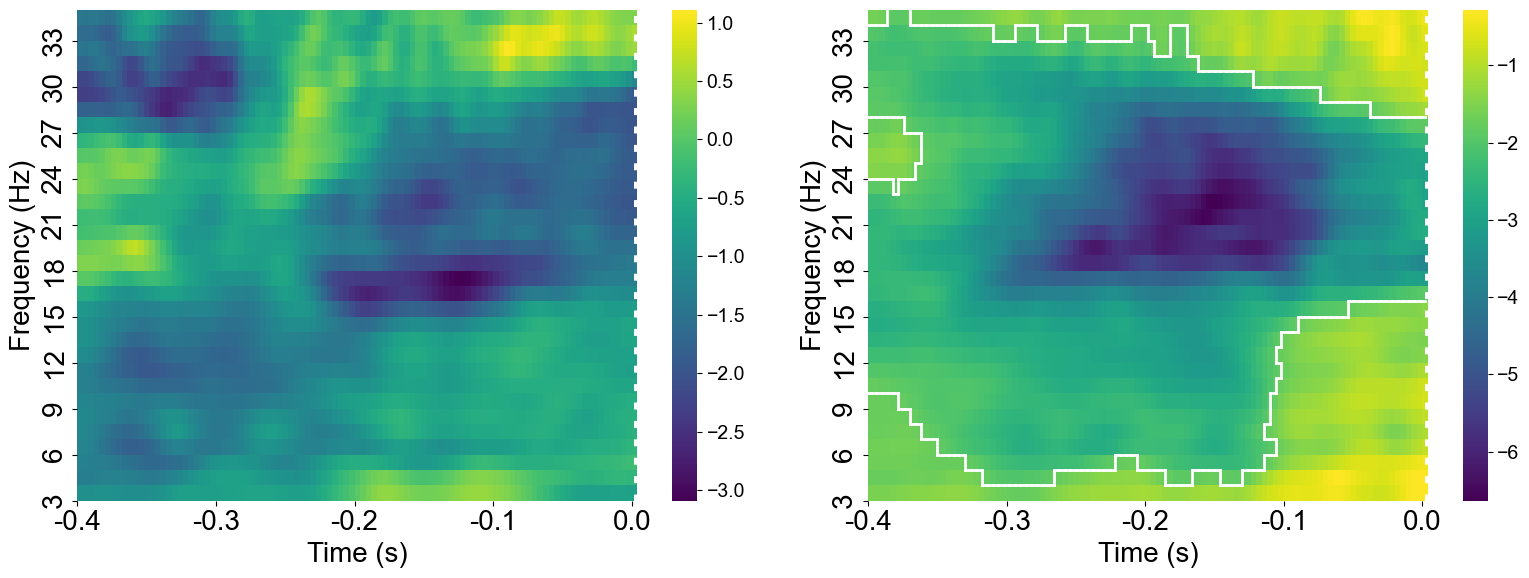

(array([[ -8.26394672,  -8.26394672,  -8.26394672, ...,  -1.70490447,
          -1.13701363,  -1.13701363],
        [ -8.79775027,  -8.79775027,  -8.79775027, ...,  -1.13701363,
          -1.13701363,  -1.13701363],
        [ -8.77129276,  -8.77129276,  -8.77129276, ...,  -2.27138483,
          -2.27138483,  -2.27138483],
        ...,
        [-11.15986107, -11.15986107, -11.60807976, ...,  -3.95778926,
          -3.95778926,  -3.39832523],
        [-10.23290011, -10.23290011, -10.7023679 , ...,  -3.96778926,
          -3.95778926,  -2.8360086 ],
        [ -8.77129276,  -8.77129276,  -8.77129276, ...,  -3.39832523,
          -2.8360086 ,  -2.27138483]]),
 array([0.1 , 0.1 , 0.1 , ..., 0.84, 0.93, 0.98]))

In [4]:
# run cluster based permutation tests for the conditions contrasts
# and plot sign. cluster
tfr.plot_tfr_cluster_test_output(cond='probability', tfr_a_cond=tfr_a_cond, tfr_b_cond=tfr_b_cond,
threed_test=False, cond_a_name='high', cond_b_name='low', channel_names=['CP4'])

previous response contrast

In [ ]:
# load the tfr data for each condition for prev_resp conds.
tfr_a_cond, tfr_b_cond = tfr.load_tfr_conds(studies=[1, 2], cond='prev_resp',
                                            cond_a_name='prevyesresp_highprob_stim_mirror',
                                            cond_b_name='prevnoresp_highprob_stim_mirror',
                                            cond_a_names=None, cond_b_names=None)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy functi

100%|██████████| Permuting : 9999/9999 [02:39<00:00,   62.54it/s]


smallest cluster p-value: 0.0186
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: p

100%|██████████| Permuting : 9999/9999 [02:29<00:00,   67.01it/s]


smallest cluster p-value: 0.6431


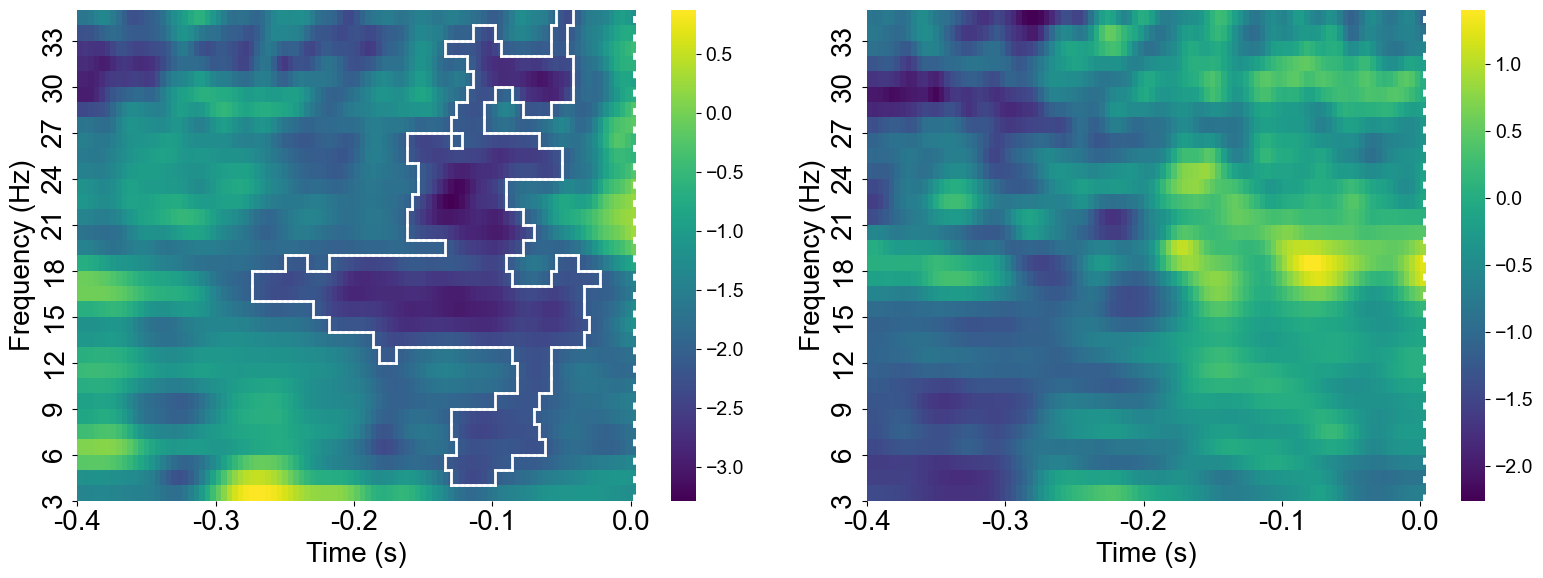

(array([[-4.16348357, -4.16348357, -4.16348357, ..., -1.3489882 ,
         -1.3489882 , -1.29154257],
        [-4.24472396, -4.24472396, -4.24472396, ..., -1.39370956,
         -1.39370956, -1.39370956],
        [-4.26472396, -4.26472396, -4.26472396, ..., -1.29154257,
         -1.29154257, -1.29154257],
        ...,
        [-3.1998889 , -3.38830333, -3.38830333, ..., -1.21638952,
         -1.21638952, -1.16739973],
        [-2.8680757 , -2.8680757 , -3.1998889 , ..., -1.21638952,
         -1.23638952, -1.25053166],
        [-3.1998889 , -3.1998889 , -3.1998889 , ..., -1.21638952,
         -1.23638952, -1.27053166]]),
 array([0.7, 0.7, 0.7, ..., 1. , 1. , 1. ]))

In [7]:
# run cluster based permutation tests for the conditions contrasts
# and plot sign. cluster
tfr.plot_tfr_cluster_test_output(cond='prev_resp', tfr_a_cond=tfr_a_cond, tfr_b_cond=tfr_b_cond,
                                 threed_test=False, cond_a_name='prevyesresp',
                                 cond_b_name='prevnoresp', channel_names=['CP4'])

In [8]:
from expecon_ms.eeg.sensor import tfr_trial

Last Commit Date for /data/pt_02773/expecon_ms/code/expecon_ms/behav/figure1.py : Fri Jan 5 05:05:45 2024 +0100
Last Commit Date for /data/pt_02773/expecon_ms/code/expecon_ms/eeg/sensor/tfr_trial.py : Wed Dec 20 11:51:40 2023 +1000


In [ ]:
# add alpha and beta power per trial to behavioral data and save in csv file for further analysis in R
tfr_trial.save_band_power_per_trial(study=2,
                                    time_intervals={'pre': [(-0.2,0), (-0.3, -0.1)]},
                                    channel_names=['CP4'],
                                    mirror=True)

4. Source reconstruction

In [2]:
# import relevant functions from expecon_ms
from expecon_ms.eeg.source import source_reco

Last Commit Date for /data/pt_02773/expecon_ms/code/expecon_ms/eeg/source/source_reco.py : Fri Jan 5 05:05:45 2024 +0100


In [ ]:
# run source reconstruction for each condition
source_reco.run_source_reco(study=2,
                            cond="probability",
                            mirror=True,
                            dics=True, fmin=15, fmax=25,
                            tmin=-0.4, tmax=0,
                            drop_bads=True,
                            plot_alignment=False)

In [6]:
# plot source contrast (grand average over all participants)
source_reco.plot_grand_average_source_contrast(study=2, cond='prev_resp', method='beamformer')

Permuting 9999 times...
% of significant vertices: 0.001708150317227916
    Reading a source space...
    [done]
    Reading a source space...
    [done]
    2 source spaces read
0 files missing from root.txt in /data/hu_forster/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /data/hu_forster/mne_data/MNE-fsaverage-data/fsaverage


RuntimeError: Could not load any valid 3D backend
pyvistaqt: No Qt bindings could be found
notebook: No module named 'ipywidgets'

 install pyvistaqt, using pip or conda:
'pip install pyvistaqt'
'conda install -c conda-forge pyvistaqt'

 or install ipywidgets, if using a notebook backend
'pip install ipywidgets'
'conda install -c conda-forge ipywidgets'

### Intermediate summary
Analysis of eeg data showed that in somatosensory regions, prestimulus beta power codes stimulus expectations in the volatile environment. For the stable environment prestimulus beta power codes the previous response. Source reconstruction shows the beta power source for stimulus probability in S2 and for previous responses in posterior cortex and ACC.